This notebook is for clean and handle our dataset 

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = 'heart_disease_uci.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### a littel check

In [4]:
#ensure that all null value is NaN 
missing_values = ['NULL', '-', '?', 'NA', 'None', '']

for col in df.columns:
    mask = df[col].isin(missing_values)
    if mask.any():
        print(f"Column '{col}' contains non-NaN missing values:")
        print(df[col][mask])
    else:
        print(f"Column '{col}' has not contains non-NaN missing values")

Column 'id' has not contains non-NaN missing values
Column 'age' has not contains non-NaN missing values
Column 'sex' has not contains non-NaN missing values
Column 'dataset' has not contains non-NaN missing values
Column 'cp' has not contains non-NaN missing values
Column 'trestbps' has not contains non-NaN missing values
Column 'chol' has not contains non-NaN missing values
Column 'fbs' has not contains non-NaN missing values
Column 'restecg' has not contains non-NaN missing values
Column 'thalch' has not contains non-NaN missing values
Column 'exang' has not contains non-NaN missing values
Column 'oldpeak' has not contains non-NaN missing values
Column 'slope' has not contains non-NaN missing values
Column 'ca' has not contains non-NaN missing values
Column 'thal' has not contains non-NaN missing values
Column 'num' has not contains non-NaN missing values


In [5]:
print("Unique values in 'thal' before encoding:", df['thal'].copy().unique())
print("Unique values in 'ca' before encoding:", df['ca'].copy().unique())
print("Unique values in 'slope' before encoding:", df['slope'].copy().unique())

Unique values in 'thal' before encoding: ['fixed defect' 'normal' 'reversable defect' nan]
Unique values in 'ca' before encoding: [ 0.  3.  2.  1. nan]
Unique values in 'slope' before encoding: ['downsloping' 'flat' 'upsloping' nan]


# Data Cleaning

## A. Dealing with missing values:

1. **Delete rows:** If missing values ​​are few.

2. **Substitute values [imputation]:** Use mean or median for numeric columns or **Using ML models**

here we look to two thing :
1. importent of feature 
2. The proportion of missing values relative to the total number of dataset rows.


| null at each feature % | correlation [important of the feature] |
|-----------------------|--------------------------------------|
| 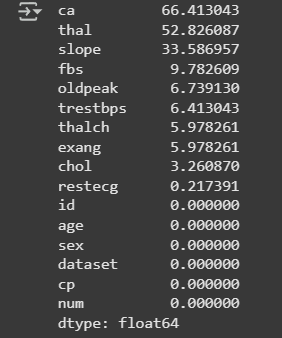 | 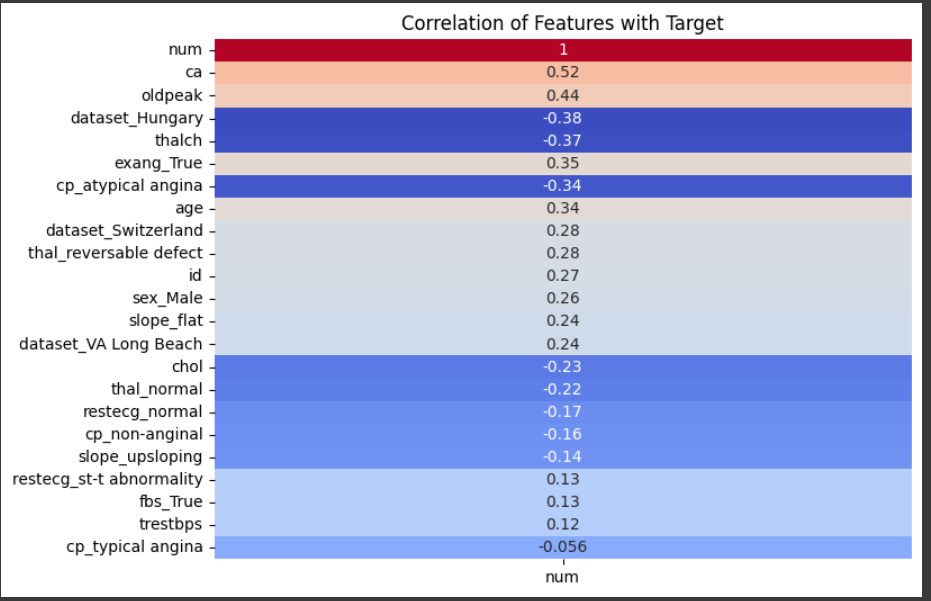 |




--------------------

### (ca) Feature

=> ca feature has 66% null values and it is the highest correlation with target also It consists of four main categories [0,1,2,3].
<br>
| 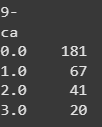 | *In the figure on the left it appears that more than half of the values ​​are below the value 0. My guess is that the missing values ​​are zero and their entry was ignored.* |
|------------------------------------|------------------------------------------------------------------------------------------------------------------------------------|

However I will fill it using mode once and ML another time.

#### Using mode

In [6]:
# USING MODE
data_cleaned_usingMode = df.fillna({'ca': df['ca'].mode()[0]})

In [7]:
data_cleaned_usingMode.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [8]:
print ("missing values at ca feature = ",data_cleaned_usingMode['ca'].isnull().sum())
print ("count of each value at faeature",data_cleaned_usingMode['ca'].value_counts())

missing values at ca feature =  0
count of each value at faeature ca
0.0    792
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64


*Using this method bias can occur during model training.*

----------

#### Using ML



##### 1st model --KNN--

In [9]:
# using K-Nearest Neighbors (KNN)
from sklearn.impute import KNNImputer

data_cleaned_usingKNN = df.copy()
imputer = KNNImputer(n_neighbors=5)

data_cleaned_usingKNN[['ca']] = imputer.fit_transform(data_cleaned_usingKNN[['ca']])


In [10]:
data_cleaned_usingKNN.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [11]:
print ("missing values at ca feature = ",data_cleaned_usingKNN['ca'].isnull().sum())
print ("count of each value at faeature",data_cleaned_usingKNN['ca'].value_counts())

missing values at ca feature =  0
count of each value at faeature ca
0.676375    611
0.000000    181
1.000000     67
2.000000     41
3.000000     20
Name: count, dtype: int64


*Using KNN  generated an integer new value and replaced all the missing values with it."*

--------------------

##### 2nd model --Random Forest--

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [13]:
#make a cooy 
data_cleaned_usingRF = df.copy()

Using OneHotEncoder
* OneHotEncoding is used to avoid introducing unexpected or out-of-scope values when encoding categorical data. However, missing values (NaN) are often converted to zeros during the encoding process. To retain NaN values accurately, it’s essential to identify and handle them either before or after encoding. This ensures that missing data is treated correctly without being misrepresented as valid categories.

In [14]:
categorical_cols = ["sex", "dataset", "cp", "fbs", "restecg", "exang", "slope", "thal"]

In [15]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_categorical = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))


In [16]:
encoded_df

,sex_Female,sex_Male,dataset_Cleveland,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,...,exang_True,exang_nan,slope_downsloping,slope_flat,slope_upsloping,slope_nan,thal_fixed defect,thal_normal,thal_reversable defect,thal_nan
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
916,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
917,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
918,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


-----------------------------------

ML 

In [17]:
# Merge encoded data with non-categorical columns
data_cleaned_usingRF = pd.concat([encoded_df, df.drop(columns=categorical_cols)], axis=1)

In [18]:
# Split data into known and missing
df_known = data_cleaned_usingRF[data_cleaned_usingRF['ca'].notnull()]
df_missing = data_cleaned_usingRF[data_cleaned_usingRF['ca'].isnull()]

# Prepare X and y
X = df_known.drop(columns=['ca'])
y = df_known['ca']

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train a Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict missing values
predicted_values =  rf_classifier.predict(df_missing.drop(columns=['ca']))

# Fill missing values
data_cleaned_usingRF.loc[data_cleaned_usingRF['ca'].isnull(), 'ca'] = predicted_values

In [19]:
print ("missing values at ca feature = ",data_cleaned_usingRF['ca'].isnull().sum())
print ("count of each value at faeature",data_cleaned_usingRF['ca'].value_counts())

missing values at ca feature =  0
count of each value at faeature ca
0.0    663
1.0    145
2.0     92
3.0     20
Name: count, dtype: int64


*Using RF gives a different,a littel more balanced result.*

-----------------

### (thal) feature 

=> thal feature has 52% null values and it has some good correlation with target <br>

=> also It consists of three main categories [normal , reversable defect , fixed defect].


| 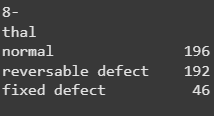 | *"thal" is a categorical column and has a close distribution between the categories, filling it with the most frequent value may reduce the quality of the data and affect the accuracy of the models.* |
|------------------------------------|------------------------------------------------------------------------------------------------------------------------------------|


In [20]:
categorical_cols_2 = ["sex", "dataset", "cp", "fbs", "restecg", "exang", "slope"]
target_col = 'thal'

In [21]:
encoder_2 = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_categorical_2 = encoder.fit_transform(df[categorical_cols])
encoded_df_2 = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))

In [22]:
# Merge encoded data with non-categorical columns
data_cleaned_usingRF_2 = pd.concat([encoded_df, df.drop(columns=categorical_cols_2)], axis=1)

In [23]:
# Split data into known and missing
df_known = data_cleaned_usingRF_2[data_cleaned_usingRF_2['thal'].notnull()]
df_missing = data_cleaned_usingRF_2[data_cleaned_usingRF_2['thal'].isnull()]

# Prepare X and y
X = df_known.drop(columns=['thal'])
y = df_known['thal']

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train a Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict missing values
predicted_values =  rf_classifier.predict(df_missing.drop(columns=['thal']))

# Fill missing values
data_cleaned_usingRF_2.loc[data_cleaned_usingRF_2['thal'].isnull(), 'thal'] = predicted_values

In [24]:
print ("missing values at thal feature = ",data_cleaned_usingRF_2['thal'].isnull().sum())
print ("count of each value at faeature",data_cleaned_usingRF_2['thal'].value_counts())

missing values at thal feature =  0
count of each value at faeature thal
normal               497
reversable defect    263
fixed defect         160
Name: count, dtype: int64


----------------

#### slope Feature

=> thal feature has 33% null values and it has some good correlation with target <br>

=> also It consists of three main categories [flat , upsloping , downsloping].


| 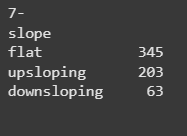 | *"thal" is a categorical column and has a close distribution between the categories, filling it with the most frequent value may reduce the quality of the data and affect the accuracy of the models.* |
|------------------------------------|------------------------------------------------------------------------------------------------------------------------------------|


In [25]:
categorical_cols_2 = ["sex", "dataset", "cp", "fbs", "restecg", "exang", "thal"]
target_col = 'slope'

In [26]:
encoder_3 = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_categorical_3 = encoder.fit_transform(df[categorical_cols])
encoded_df_3 = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))

In [27]:
# Merge encoded data with non-categorical columns
data_cleaned_usingRF_3 = pd.concat([encoded_df, df.drop(columns=categorical_cols_2)], axis=1)

In [28]:
# Split data into known and missing
df_known = data_cleaned_usingRF_3[data_cleaned_usingRF_3['slope'].notnull()]
df_missing = data_cleaned_usingRF_3[data_cleaned_usingRF_3['slope'].isnull()]

# Prepare X and y
X = df_known.drop(columns=['slope'])
y = df_known['slope']

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train a Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict missing values
predicted_values =  rf_classifier.predict(df_missing.drop(columns=['slope']))

# Fill missing values
data_cleaned_usingRF_3.loc[data_cleaned_usingRF_3['slope'].isnull(), 'slope'] = predicted_values

In [29]:
print ("missing values at slope feature = ",data_cleaned_usingRF_3['slope'].isnull().sum())
print ("count of each value at faeature",data_cleaned_usingRF_3['slope'].value_counts())

missing values at slope feature =  0
count of each value at faeature slope
flat           459
upsloping      381
downsloping     80
Name: count, dtype: int64


-------------

#### Working on numerical columns

* It was observed that there were outliers in these columns, which makes it essential to use the median for handling this issue .

In [30]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

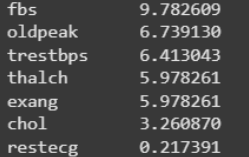

In [31]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

In [32]:
numeric_cols

Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')

In [33]:
# Columns to fill missing values
columns_to_fill = [ 'trestbps', 'chol', 'thalch', 'oldpeak']

In [34]:
# Creating a dictionary of columns and their filled values
filled_values = {col: df[col].fillna(df[col].median()) for col in numeric_cols}

In [35]:
# Updating the DataFrame
df.update(pd.DataFrame(filled_values))

In [36]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,0.0,NaN,1
916,917,62,Male,VA Long Beach,typical angina,130.0,139.0,False,st-t abnormality,140.0,NaN,0.5,NaN,0.0,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,0.0,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,130.0,385.0,True,lv hypertrophy,140.0,NaN,0.5,NaN,0.0,NaN,0


In [37]:
for col in columns_to_fill:
    print(f"Missing values in {col} = {df[col].isnull().sum()}")

Missing values in trestbps = 0
Missing values in chol = 0
Missing values in thalch = 0
Missing values in oldpeak = 0


In [38]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs          90
restecg       2
thalch        0
exang        55
oldpeak       0
slope       309
ca            0
thal        486
num           0
dtype: int64

-----------------------

#### Filling the categorical columns: 
* Given the small number of missing values, we will fill them using the **mode** (most frequent value).

In [39]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [40]:
# Selecting only categorical columns
categorical_cols =[ 'restecg','exang','fbs']

In [41]:
# Creating a dictionary of columns and their filled values
filled_values_2 = {col: df[col].fillna(df[col].mode()[0]) for col in categorical_cols}

C:\Users\SAMA\AppData\Local\Temp\ipykernel_17064\1891137028.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filled_values_2 = {col: df[col].fillna(df[col].mode()[0]) for col in categorical_cols}


In [42]:
# Updating the DataFrame
df.update(pd.DataFrame(filled_values_2))

In [43]:
for col in categorical_cols:
    print(f"Missing values in {col} = {df[col].isnull().sum()}")

Missing values in restecg = 0
Missing values in exang = 0
Missing values in fbs = 0


----------------

**Now, we will merge all the values from the different DataFrames into a single unified DataFrame.**

* From `df`, we will take all the columns except **"thal"**, **"ca"**, and **"slope"**.  
* From `data_cleaned_usingRF`, we will take only the **"ca"** column.  
* From `data_cleaned_usingRF_2`, we will take only the **"thal"** column.  
* From `data_cleaned_usingRF_3`, we will take only the **"slope"** column.  

In [44]:
# Selecting the necessary columns from each DataFrame
df_part = df.drop(columns=['thal', 'ca', 'slope'])
ca_part = data_cleaned_usingRF[['ca']]
thal_part = data_cleaned_usingRF_2[['thal']]
slope_part = data_cleaned_usingRF_3[['slope']]

final_df = pd.concat([df_part, ca_part, thal_part, slope_part], axis=1)

In [45]:
final_df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
ca          0
thal        0
slope       0
dtype: int64

In [46]:
final_df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num,ca,thal,slope
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0,0.0,fixed defect,downsloping
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2,3.0,normal,flat
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1,2.0,reversable defect,flat
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0,0.0,normal,downsloping
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0,0.0,normal,upsloping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,1,0.0,normal,flat
916,917,62,Male,VA Long Beach,typical angina,130.0,139.0,False,st-t abnormality,140.0,False,0.5,0,0.0,normal,upsloping
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,2,1.0,fixed defect,flat
918,919,58,Male,VA Long Beach,asymptomatic,130.0,385.0,True,lv hypertrophy,140.0,False,0.5,0,0.0,normal,flat


In [47]:
#Delete ineffective column
final_df = final_df.drop(columns=['id','dataset'])

In [48]:
final_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num,ca,thal,slope
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0,0.0,fixed defect,downsloping
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2,3.0,normal,flat
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1,2.0,reversable defect,flat
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0,0.0,normal,downsloping
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0,0.0,normal,upsloping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,1,0.0,normal,flat
916,62,Male,typical angina,130.0,139.0,False,st-t abnormality,140.0,False,0.5,0,0.0,normal,upsloping
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,2,1.0,fixed defect,flat
918,58,Male,asymptomatic,130.0,385.0,True,lv hypertrophy,140.0,False,0.5,0,0.0,normal,flat


### Need to handle outliers before do Normalize or standardize

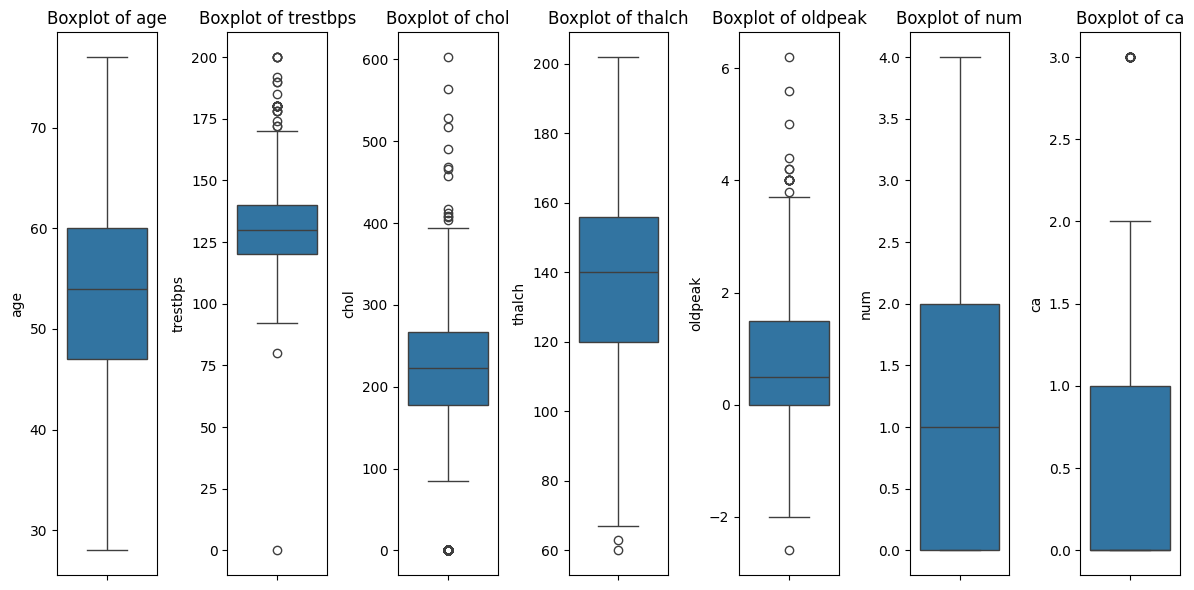

**Outlier Analysis:**
 - Some outliers may represent rare but valid medical conditions, such as extremely high blood pressure or cholesterol levels.
 - Other outliers are likely due to data entry errors, like values close to 0 or negative numbers in variables where they aren't expected.
 - We will retain outliers that have medical significance while removing those that appear to be erroneous to maintain data quality and model performance.

-----------

In [49]:
valid_ranges = {
    'age': (18, 100),
    'trestbps': (60, 200),  # Typical resting blood pressure range
    'chol': (100, 450),    # Serum cholesterol levels in mg/dl
    'thalch': (60, 220),  # Max heart rate achieved
    'oldpeak': (0, 5),   # ST depression relative to rest
}

In [50]:
for col, (min_val, max_val) in valid_ranges.items():
    final_df[col] = final_df[col].clip(min_val, max_val)

In [51]:

final_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num,ca,thal,slope
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0,0.0,fixed defect,downsloping
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2,3.0,normal,flat
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1,2.0,reversable defect,flat
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0,0.0,normal,downsloping
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0,0.0,normal,upsloping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,1,0.0,normal,flat
916,62,Male,typical angina,130.0,139.0,False,st-t abnormality,140.0,False,0.5,0,0.0,normal,upsloping
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,2,1.0,fixed defect,flat
918,58,Male,asymptomatic,130.0,385.0,True,lv hypertrophy,140.0,False,0.5,0,0.0,normal,flat


## B. Normalize or standardize data for model compatibility:

## Normalization vs Standardization

When preparing data for machine learning, choosing between **Normalization** and **Standardization** depends on the shape and distribution of your data, as well as the model you’re using. Let’s break them down:

### 📝 Use **Normalization (Min-Max Scaling)** when:
This technique scales all feature values between a fixed range, usually [0, 1] or [-1, 1].
- All values are in a positive range, and there are **no outliers**.
- Data is **not normally distributed** (i.e., not Gaussian).
- You’re working with **distance-sensitive models** like:
  - **K-Nearest Neighbors (KNN)**
  - **Neural Networks**

**Formula:**
$$X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$$


---

### 📝 Use **Standardization (Z-Score Scaling)** when:
This method centers the data around 0 with a standard deviation of 1. 
- **Outliers are present**.
- Data is approximately **normally distributed** (bell curve).
- You’re working with models based on **regression or distribution**, such as:
  - **Logistic Regression**
  - **Support Vector Machines (SVM)**
  - **Random Forest**

**Formula:**
$$X_{std} = \frac{X - \mu}{\sigma}$$

Where:
- `X` = original value
- `X_min`, `X_max` = minimum and maximum values of the feature
- `μ` = mean of the feature
- `σ` = standard deviation of the feature

---




### Check our data

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

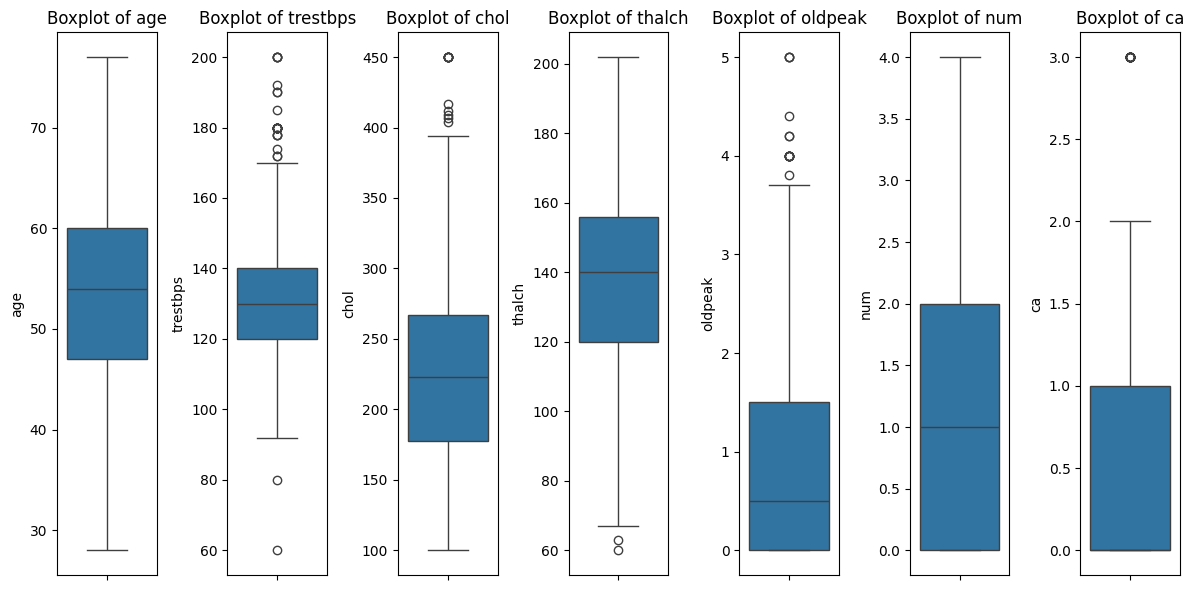

In [53]:
# Selecting only numeric columns
numeric_cols = final_df.select_dtypes(include=[np.number]).columns

# Visualizing distributions and outliers
plt.figure(figsize=(12, 6))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=final_df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

*having outliers at [trestbps , chol , thalch , oldpeak , ca]*

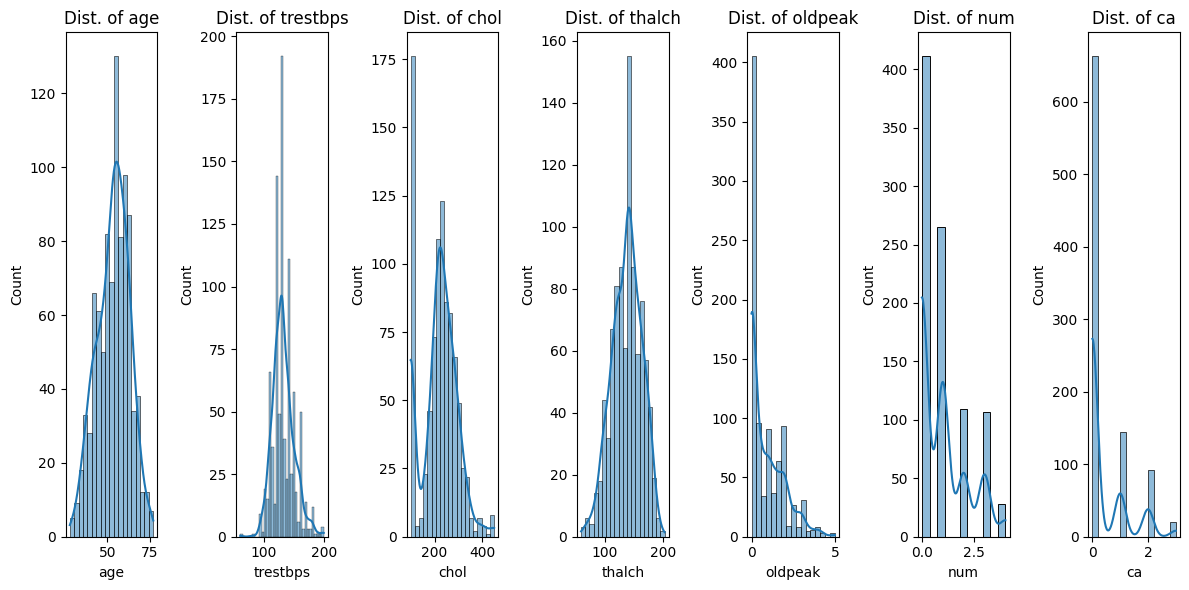

In [54]:
# Visualizing histograms
plt.figure(figsize=(12, 6))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.histplot(final_df[col], kde=True)
    plt.title(f"Dist. of {col}")

plt.tight_layout()
plt.show()

*Most of the distributions are normal, with outliers in the two columns (chol , oldpeak). The non-normal distributions are in the two columns (num , ca).*

---

Since there is a clear difference in the characteristics of the columns, we decided to use both **Normalization** and **Standardization** to properly handle each type of data:  

- **Normalization:** Applied to the columns: `'num'`, `'ca'` — because they have a **non-normal distribution**, and normalization preserves the relationships between their values.  
- **Standardization:** Applied to the columns: `'age' `,`'trestbps'`, `'chol'`, `'thalch'`, `'oldpeak'` — because most of them **follow a normal distribution** with the presence of **outliers**, making standardization the best choice.  

This approach is the **optimal solution** as it considers the distribution of each column and the presence of outliers, ensuring better model performance. 

In [55]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [56]:
# Columns to Normalize and Standardize
normalize_cols = ['num', 'ca']
standardize_cols = ['age','trestbps', 'chol', 'thalch', 'oldpeak']


In [57]:
# Initialize scalers
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [58]:
# Apply Normalization
final_df[normalize_cols] = minmax_scaler.fit_transform(final_df[normalize_cols])

In [59]:
# Apply Standardization
final_df[standardize_cols] = standard_scaler.fit_transform(final_df[standardize_cols])


In [60]:
final_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num,ca,thal,slope
0,1.007386,Male,typical angina,0.715785,0.199127,True,lv hypertrophy,0.489727,False,1.396276,0.00,0.000000,fixed defect,downsloping
1,1.432034,Male,asymptomatic,1.545575,0.906503,False,lv hypertrophy,-1.181478,True,0.617806,0.50,1.000000,normal,flat
2,1.432034,Male,asymptomatic,-0.667200,0.145740,False,lv hypertrophy,-0.345875,True,1.688203,0.25,0.666667,reversable defect,flat
3,-1.752828,Male,non-anginal,-0.114006,0.426021,False,normal,1.961979,False,2.563983,0.00,0.000000,normal,downsloping
4,-1.328180,Female,atypical angina,-0.114006,-0.187928,False,lv hypertrophy,1.365120,False,0.520497,0.00,0.000000,normal,upsloping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,0.051927,Female,asymptomatic,-0.279964,1.533799,True,st-t abnormality,0.648889,False,-0.841827,0.25,0.000000,normal,flat
916,0.901224,Male,typical angina,-0.114006,-1.055464,False,st-t abnormality,0.091821,False,-0.355283,0.00,0.000000,normal,upsloping
917,0.158089,Male,asymptomatic,-0.556561,0.065660,True,st-t abnormality,-1.499803,False,-0.841827,0.50,0.333333,fixed defect,flat
918,0.476575,Male,asymptomatic,-0.114006,2.227828,True,lv hypertrophy,0.091821,False,-0.355283,0.00,0.000000,normal,flat


**Verification Steps**:
1. Confirm **Normalization**: Values should be between 0 and 1.
2. Confirm **Standardization**: Mean should be around 0, and Standard Deviation around 1.
3. Visualize distributions using histograms or boxplots after scaling.
4. Check statistical summaries (min, max, mean, std) to ensure proper scaling.


In [61]:
# Verification
import pandas as pd
from tabulate import tabulate

# Normalization Verification
norm_summary = final_df[normalize_cols].describe().T
print("--- Normalization Verification ---")
print(tabulate(norm_summary, headers='keys', tablefmt='pretty', floatfmt=".3f"))

# Standardization Verification
std_summary = final_df[standardize_cols].describe().T
print("\n--- Standardization Verification ---")
print(tabulate(std_summary, headers='keys', tablefmt='pretty', floatfmt=".3f"))


--- Normalization Verification ---
+-----+-------+---------------------+---------------------+-----+-----+------+--------------------+-----+
|     | count |        mean         |         std         | min | 25% | 50%  |        75%         | max |
+-----+-------+---------------------+---------------------+-----+-----+------+--------------------+-----+
| num | 920.0 | 0.24891304347826088 | 0.28567335083450923 | 0.0 | 0.0 | 0.25 |        0.5         | 1.0 |
| ca  | 920.0 | 0.14094202898550726 | 0.25278539050784365 | 0.0 | 0.0 | 0.0  | 0.3333333333333333 | 1.0 |
+-----+-------+---------------------+---------------------+-----+-----+------+--------------------+-----+

--- Standardization Verification ---
+----------+-------+-------------------------+--------------------+---------------------+---------------------+----------------------+--------------------+--------------------+
|          | count |          mean           |        std         |         min         |         25%         |   

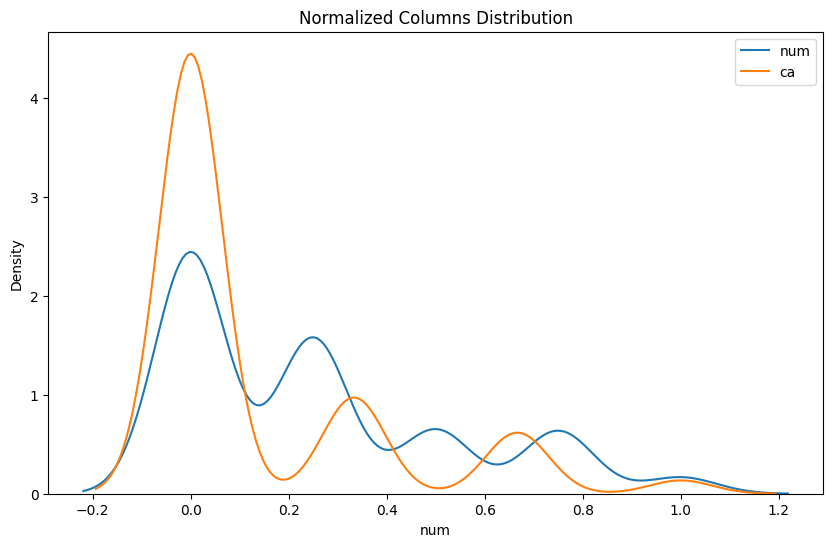

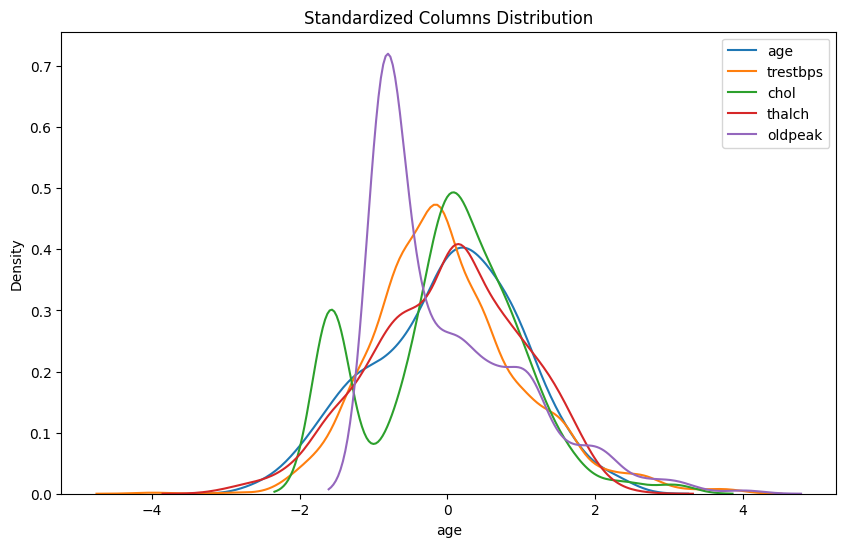

In [62]:
# Visualizing Distributions after Scaling
def plot_distributions(columns, title):
    plt.figure(figsize=(10, 6))
    for col in columns:
        sns.kdeplot(final_df[col], label=col)
    plt.title(title)
    plt.legend()
    plt.show()

plot_distributions(normalize_cols, 'Normalized Columns Distribution')
plot_distributions(standardize_cols, 'Standardized Columns Distribution')

## C. Encode categorical variables 

**One-Hot Encoding:** For columns with unordered categorical values, where each category gets a separate column.

- sex (Male/Female)
- cp (Chest pain type)
- restecg (Resting ECG results)
- slope (Slope of ST segment)
- thal (Thalassemia types)

**Label Encoding:** For columns with binary values ​​(True/False) because they are just numerical signals.

- fbs (Fasting blood sugar)
- exang (Exercise-induced angina)

In [63]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [64]:
# Columns for encoding
one_hot_cols = ['sex', 'cp', 'restecg', 'slope', 'thal']
label_cols = ['fbs', 'exang']

In [65]:
# One-Hot Encoding
final_df = pd.get_dummies(final_df, columns=one_hot_cols)

In [66]:
# Label Encoding
le = LabelEncoder()
for col in label_cols:
    final_df[col] = le.fit_transform(final_df[col])

In [67]:
print("--- Encoded DataFrame Head ---")
final_df.head()


--- Encoded DataFrame Head ---


,age,trestbps,chol,fbs,thalch,exang,oldpeak,num,ca,sex_Female,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,1.007386,0.715785,0.199127,1,0.489727,0,1.396276,0.00,0.000000,False,...,True,True,False,False,True,False,False,True,False,False
1,1.432034,1.545575,0.906503,0,-1.181478,1,0.617806,0.50,1.000000,False,...,False,True,False,False,False,True,False,False,True,False
2,1.432034,-0.667200,0.145740,0,-0.345875,1,1.688203,0.25,0.666667,False,...,False,True,False,False,False,True,False,False,False,True
3,-1.752828,-0.114006,0.426021,0,1.961979,0,2.563983,0.00,0.000000,False,...,False,False,True,False,True,False,False,False,True,False
4,-1.328180,-0.114006,-0.187928,0,1.365120,0,0.520497,0.00,0.000000,True,...,False,True,False,False,False,False,True,False,True,False


In [68]:
# Converting boolean columns to integers (0 and 1)
final_df = final_df.applymap(lambda x: 1 if x == True else (0 if x == False else x))

C:\Users\SAMA\AppData\Local\Temp\ipykernel_17064\1498759922.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  final_df = final_df.applymap(lambda x: 1 if x == True else (0 if x == False else x))


In [69]:
final_df.head()

,age,trestbps,chol,fbs,thalch,exang,oldpeak,num,ca,sex_Female,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,1.007386,0.715785,0.199127,1,0.489727,0,1.396276,0.00,0.000000,0,...,1,1,0,0,1,0,0,1,0,0
1,1.432034,1.545575,0.906503,0,-1.181478,1,0.617806,0.50,1.000000,0,...,0,1,0,0,0,1,0,0,1,0
2,1.432034,-0.667200,0.145740,0,-0.345875,1,1.688203,0.25,0.666667,0,...,0,1,0,0,0,1,0,0,0,1
3,-1.752828,-0.114006,0.426021,0,1.961979,0,2.563983,0.00,0.000000,0,...,0,0,1,0,1,0,0,0,1,0
4,-1.328180,-0.114006,-0.187928,0,1.365120,0,0.520497,0.00,0.000000,1,...,0,1,0,0,0,0,1,0,1,0


## Save the final data frame

In [70]:
final_df.to_csv('cleaned_data.csv', index=False)